In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_excel('BodyFat.xls')
df.head()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [59]:
def plot_corr_with_labels(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15,15))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns) 

ABDOMEN is the best thing to measure for adiposity prediction: 0.923880095481


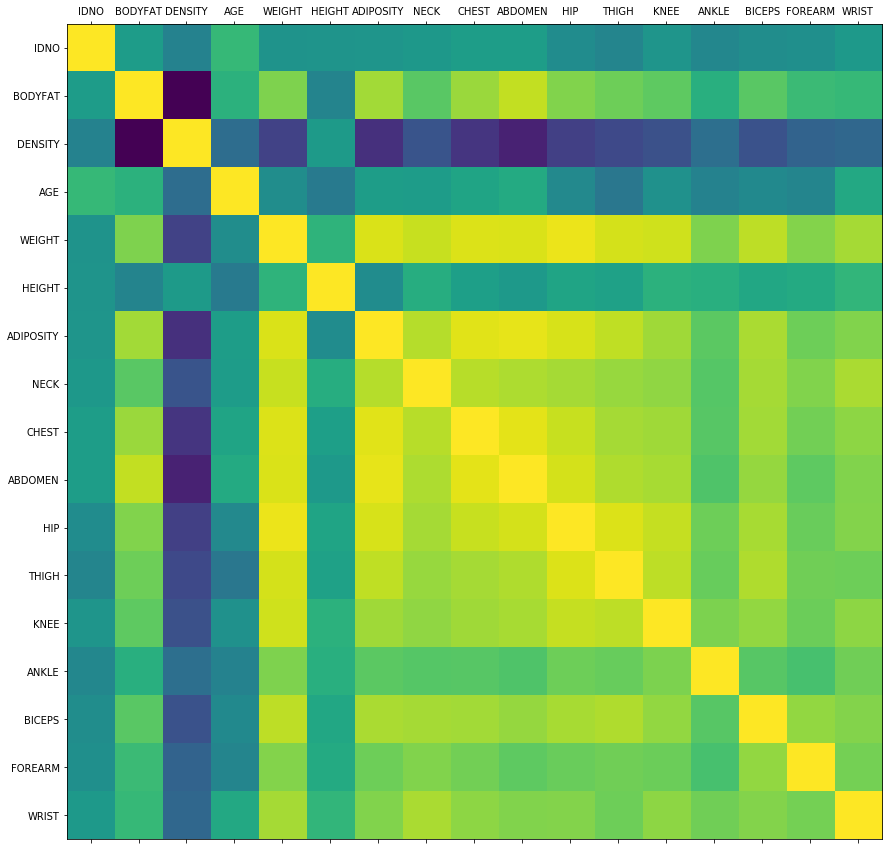

In [62]:
# Find the body characteristic that's most strongly correlated with Adiposity
# (how fat one is). That could be asked this way: what's the best thing to 
# measure if I want to predict how fat you are? Should I measure your ankle, 
# your neck, your abdomen, etc? 

plot_corr_with_labels(df)

other_features = [item for item in df.columns.values if item != 'ADIPOSITY']
df_corr = df.corr()

adiposity_corr = df_corr.loc[other_features]['ADIPOSITY']
max_value, index = np.max(adiposity_corr), np.argmax(adiposity_corr)

print (str(index) + ' is the best thing to measure for adiposity prediction: ' + str(max_value))

In [72]:
# What's the biggest change in this correlation between characteristics
# and adiposity as bodies age past 45? That could be asked this way: 
# what characteristic changes the most as you age?
under45 = df[df['AGE'] < 45]
over45 = df[df['AGE'] >= 45]

changes_corr = under45.corr()['ADIPOSITY'] - over45.corr()['ADIPOSITY']
change_max, change_max_idx = np.max(changes_corr), np.argmax(changes_corr)

print ('The biggest change in the correlation btw characteristics and adiposity is at: ' + str(change_max_idx))

The biggest change in the correlation btw characteristics and adiposity is at: KNEE


My present for you, prof:
<img src='phamcong_cat.jpg' style="height:300px" >

source: Internet